## 📍 Dataset

This example is based on the famous `gapminder` dataset. It provides the average life expectancy, gdp per capita and population size for more than 100 countries. It is available online [here](https://www.gapminder.org/data/) and I've stored a copy on the gallery [github repo](https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/data/gapminderData.csv)

Let's load it in python and have a look to the 3 first rows.

In [2]:
# Libraries
import pandas as pd

# read the data (on the web)
data = pd.read_csv('https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/data/gapminderData.csv')

# Check the first 2 rows
data.head(2)

,country,year,pop,continent,lifeExp,gdpPercap
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030


## 💭 Bubble chart

Let's build a bubble chart for the first year of the dataset (1952). If you're interested in how to make bubble charts with python, the gallery has a [dedicated section](https://python-graph-gallery.com/bubble-plot/) for it.

Let's build one using the `scatter()` function of `matplotlib`:

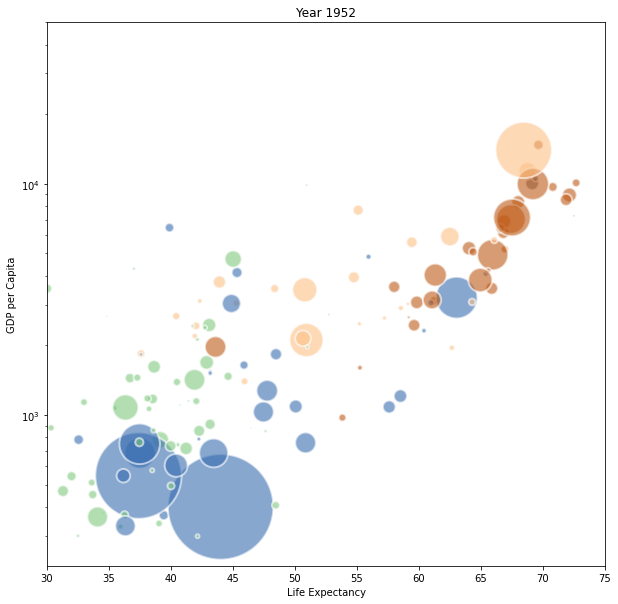

In [10]:
# import matplotlib
import matplotlib.pyplot as plt

# And I need to transform my categorical column (continent) in a numerical value group1->1, group2->2...
data['continent']=pd.Categorical(data['continent'])

# Set the figure size
plt.figure(figsize=(10, 10))

# Subset of the data for year 1952
data1952 = data[ data.year == 1952 ]

# Scatterplot
plt.scatter(
    x = data1952['lifeExp'], 
    y = data1952['gdpPercap'], 
    s=data1952['pop']/50000, 
    c=data1952['continent'].cat.codes, 
    cmap="Accent", 
    alpha=0.6, 
    edgecolors="white", 
    linewidth=2);
 
# Add titles (main and on axis)
plt.yscale('log')
plt.xlabel("Life Expectancy")
plt.ylabel("GDP per Capita")
plt.title("Year 1952")
plt.ylim(0,50000)
plt.xlim(30, 75);


## 🎥 Animation

An animation is basically a set of static images visualized one after the other. The strategy here is to build on `png` file for each year of the dataset, and then concatenated them as a `gif`.

Let's build a loop that will output one `png` file per year of the dataset:

In [18]:
# image resolution
dpi=96

# For each year:
for i in data.year.unique():
 
    # Turn interactive plotting off
    plt.ioff()

    # initialize a figure
    fig = plt.figure(figsize=(680/dpi, 480/dpi), dpi=dpi)
    
    # Find the subset of the dataset for the current year
    subsetData = data[ data.year == i ]

    # Build the scatterplot
    plt.scatter(
        x=subsetData['lifeExp'], 
        y=subsetData['gdpPercap'], 
        s=subsetData['pop']/200000 , 
        c=subsetData['continent'].cat.codes, 
        cmap="Accent", alpha=0.6, edgecolors="white", linewidth=2)
    
    # Add titles (main and on axis)
    plt.yscale('log')
    plt.xlabel("Life Expectancy")
    plt.ylabel("GDP per Capita")
    plt.title("Year: "+str(i) )
    plt.ylim(0,100000)
    plt.xlim(30, 90)
    
    # Save it & close the figure
    filename='/Users/yan.holtz/Desktop/Gapminder_step'+str(i)+'.png'
    plt.savefig(fname=filename, dpi=96)
    plt.gca()
    plt.close(fig)


Now, you should have a set of 12 images in the specified folder (`/Users/yan.holtz/Desktop/` for me). Image magick is a command line tool that allows to concatenate those images in a `gif` file.

Install ImageMagick with this line of bash:
`brew install imagemagick`

If you don't have `brew` installed, visit the [image magick homepage](https://imagemagick.org/index.php) for explanations.

Once the tool is installed, you can concatenate the 12 images using the following command:

In [20]:
# Bash
# convert -delay 80 Gapminder*.png animated_gapminder.gif


>Note: the above line of code is written in `bash`, not in `python`. You have to execute it in a terminal, not in your python environment.

And here is the final result ![title](https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/graph/animated_gapminder.gif)